In [1]:
import os
import pyart
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-dlbb_1ei because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
data_dir = '/lustre/or-scratch/cades-arm/scollis/sail/202112/'
all_files = os.listdir(data_dir)
all_files.sort()

In [3]:
base_scan_ppi = '1_PPI.nc'
ppi_pattern = 'PPI.nc'
base_scans = []
volumes = []
ppis = []
in_volume = False
for file in all_files:
    if ppi_pattern in file:
        ppis.append(file)
    if base_scan_ppi in file:
        base_scans.append(file)
    


In [4]:
n_tilts = 8

In [5]:
index = np.where(np.array(ppis) == base_scans[0])[0][0]
print(index)
print(ppis[index: index+n_tilts])

6
['gucxprecipradarS2.00.20211214.000420.raw.csu.sail-20211214-000420_2089_22_1_PPI.nc', 'gucxprecipradarS2.00.20211214.000452.raw.csu.sail-20211214-000452_2090_22_2_PPI.nc', 'gucxprecipradarS2.00.20211214.000524.raw.csu.sail-20211214-000524_2091_22_4_PPI.nc', 'gucxprecipradarS2.00.20211214.000556.raw.csu.sail-20211214-000556_2092_22_6_PPI.nc', 'gucxprecipradarS2.00.20211214.000628.raw.csu.sail-20211214-000628_2093_22_8_PPI.nc', 'gucxprecipradarS2.00.20211214.000700.raw.csu.sail-20211214-000700_2094_22_10_PPI.nc', 'gucxprecipradarS2.00.20211214.000732.raw.csu.sail-20211214-000732_2095_22_12_PPI.nc', 'gucxprecipradarS2.00.20211214.000804.raw.csu.sail-20211214-000804_2096_22_15_PPI.nc']


In [6]:
volumes = []
for base in base_scans:
    base_scan_index = np.where(np.array(ppis) == base)[0][0]
    #print(base_scan_index)
    volume = ppis[base_scan_index: base_scan_index+n_tilts]
    volumes.append(volume)

In [7]:
volumes[0]

['gucxprecipradarS2.00.20211214.000420.raw.csu.sail-20211214-000420_2089_22_1_PPI.nc',
 'gucxprecipradarS2.00.20211214.000452.raw.csu.sail-20211214-000452_2090_22_2_PPI.nc',
 'gucxprecipradarS2.00.20211214.000524.raw.csu.sail-20211214-000524_2091_22_4_PPI.nc',
 'gucxprecipradarS2.00.20211214.000556.raw.csu.sail-20211214-000556_2092_22_6_PPI.nc',
 'gucxprecipradarS2.00.20211214.000628.raw.csu.sail-20211214-000628_2093_22_8_PPI.nc',
 'gucxprecipradarS2.00.20211214.000700.raw.csu.sail-20211214-000700_2094_22_10_PPI.nc',
 'gucxprecipradarS2.00.20211214.000732.raw.csu.sail-20211214-000732_2095_22_12_PPI.nc',
 'gucxprecipradarS2.00.20211214.000804.raw.csu.sail-20211214-000804_2096_22_15_PPI.nc']

In [8]:
base_radar = pyart.io.read(data_dir+volumes[0][0])
radars = [pyart.io.read(data_dir+sw) for sw in volumes[0][1::]]

In [9]:
base_radar.elevation['data'].mean()

1.0109653

In [10]:
radars

In [11]:
for rad in radars:
    print(rad.elevation['data'].mean())
    print(rad.fixed_angle['data'])

1.9882648
[1.9885254]
3.9877064
[3.988037]
5.987321
[5.987549]
7.986743
[7.9870605]
9.986295
[9.986572]
11.98583
[11.986084]
14.752037
[4.5608e-41]


In [12]:
for rad in radars:
    base_radar = pyart.util.join_radar(base_radar, rad)

In [13]:
base_radar.nsweeps

8

In [16]:
base_radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: altitude
	units: m
	_FillValue: -9999.0
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (9089,)>
	standard_name: ray_azimuth_angle
	long_name: azimuth_angle_from_true_north
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float32 and shape: (9089,)>
	standard_name: ray_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	axis: radial_elevation_coordinate
fields:
	DBZ:
		data: <ndarray of type: float64 and shape: (9089, 675)>
		standard_name: equivalent_reflectivity_factor
		units: dBZ
		_FillValue: -32768.0
		coordinates: elevation azimuth range
	VEL:
		data: <ndarray of type: float64 and shape: (9089, 675)>
		standard_name: radial_velocity_of_scatterers_away_from_instruments
		units: m/s
		_FillValue: -32768.0
		coordinates: elevation azimuth range
	WIDTH:
		data: <ndarray of 

In [17]:
base_radar.fixed_angle

{'data': masked_array(data=[1.0107422e+00, 1.9885254e+00, 3.9880371e+00,
                    5.9875488e+00, 7.9870605e+00, 9.9865723e+00,
                    1.1986084e+01, 4.5608061e-41],
              mask=False,
        fill_value=1e+20,
             dtype=float32)}

In [18]:
def radar_glue(b_radar, radar_list):
    for rad in radar_list:
        b_radar = pyart.util.join_radar(b_radar, rad)
    
    return b_radar

In [19]:
def volume_from_list(vlist, base_dir):
    base_radar = pyart.io.read(base_dir+vlist[0])
    radars = [pyart.io.read(base_dir+sw) for sw in vlist[1::]]
    return radar_glue(base_radar, radars)

In [20]:
fourth_volume = volume_from_list(volumes[400], data_dir)

/home/scollis/anaconda3/envs/pyart-simple/lib/python3.6/site-packages/pyart/graph/radarmapdisplay.py:279: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  UserWarning)


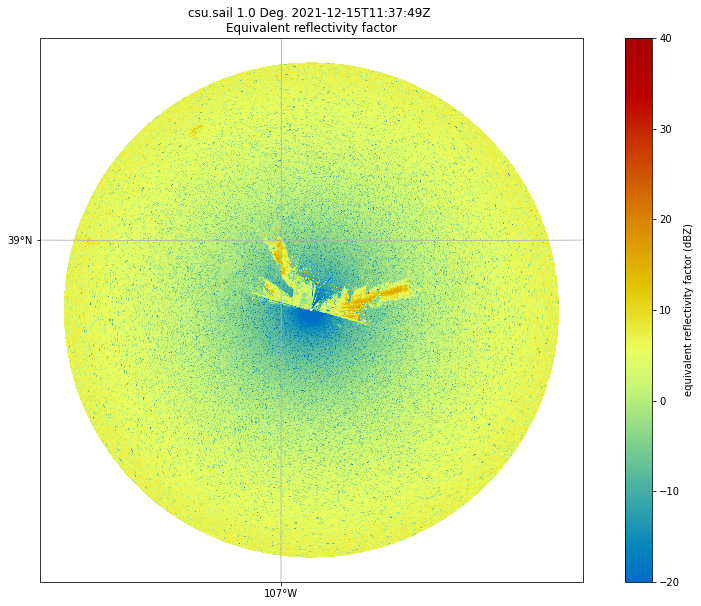

In [21]:
figme = plt.figure(figsize=[15,10])
display = pyart.graph.RadarMapDisplay(fourth_volume)
    
# Add our reflectivity (DBZ) field to the plot, including our gatefilter
display.plot_ppi_map('DBZ', 0, vmin=-20, vmax=40.)


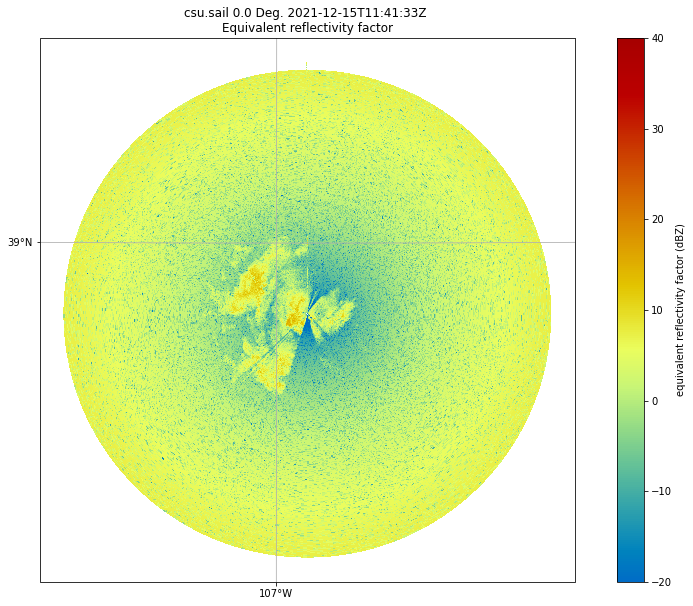

In [22]:
figme = plt.figure(figsize=[15,10])
display = pyart.graph.RadarMapDisplay(fourth_volume)
    
# Add our reflectivity (DBZ) field to the plot, including our gatefilter
display.plot_ppi_map('DBZ', 7, vmin=-20, vmax=40.)


In [25]:
for vvl in volumes[0:2]:
    if len(vvl) == n_tilts:
        out_radar = volume_from_list(vvl, data_dir)
        print(out_radar.time['units'][14:])
        ff = time.strptime(out_radar.time['units'][14:], '%Y-%m-%dT%H:%M:%SZ')
        dt = datetime.datetime.fromtimestamp(time.mktime(ff)) + datetime.timedelta(seconds= int(out_radar.time['data'][0]))
        strform = dt.strftime('/lustre/or-scratch/cades-arm/scollis/sail/202112_glued/xprecipradar_guc_volume_%Y%m%d-%H%M%S.b1.nc')
        print(strform)
        #FIX for join issue.. to be fixed in Py-ART
        out_radar.sweep_mode['data']=np.tile(radars[0].sweep_mode['data'], n_tilts)
        pyart.io.write_cfradial(strform, out_radar)
        

1970-01-01T00:00:00Z
/lustre/or-scratch/cades-arm/scollis/sail/202112_glued/xprecipradar_guc_volume_20211214-000420.b1.nc
1970-01-01T00:00:00Z
/lustre/or-scratch/cades-arm/scollis/sail/202112_glued/xprecipradar_guc_volume_20211214-000940.b1.nc


In [ ]:
acompletelynewradar = pyart.io.read('/lustre/or-scratch/cades-arm/scollis/sail/202112_glued/xprecipradar_guc_volume_20211214-000420.b1.nc')

In [ ]:
figme = plt.figure(figsize=[15,10])
display = pyart.graph.RadarMapDisplay(acompletelynewradar)
    
# Add our reflectivity (DBZ) field to the plot, including our gatefilter
display.plot_ppi_map('DBZ', 7, vmin=-20, vmax=40.)


In [32]:
def granule(Dvolume):
    data_dir = '/lustre/or-scratch/cades-arm/scollis/sail/202112/'
    if len(Dvolume) == 8:
        base_rad = pyart.io.read(data_dir+Dvolume[0])
        out_radar = volume_from_list(Dvolume, data_dir)
        print(out_radar.time['units'][14:])
        ff = time.strptime(out_radar.time['units'][14:], '%Y-%m-%dT%H:%M:%SZ')
        dt = datetime.datetime.fromtimestamp(time.mktime(ff)) + datetime.timedelta(seconds= int(out_radar.time['data'][0]))
        strform = dt.strftime('/lustre/or-scratch/cades-arm/scollis/sail/202112_glued/xprecipradar_guc_volume_%Y%m%d-%H%M%S.b1.nc')
        print(strform)
        #FIX for join issue.. to be fixed in Py-ART
        out_radar.sweep_mode['data']=np.tile(base_rad.sweep_mode['data'], n_tilts)
        pyart.io.write_cfradial(strform, out_radar)

In [33]:
granule(volumes[0])

1970-01-01T00:00:00Z
/lustre/or-scratch/cades-arm/scollis/sail/202112_glued/xprecipradar_guc_volume_20211214-000420.b1.nc


In [34]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster()

cluster.scale(32)  # Sets the number of workers to 10
cluster.adapt(minimum=16, maximum=32)
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:34452 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 32 Cores: 256 Memory: 2.16 TB


In [35]:
future = client.map(granule, volumes)

In [36]:
my_data = client.gather(future)

distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nann